In [2]:
# Import necessary libraries
import sys
import pandas as pd          # For data manipulation and analysis
import numpy as np           # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
from PIL import Image
import seaborn as sns        # For statistical data visualization
import random
import tensorflow as tf 
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Convolution2D, MaxPooling2D, GlobalAveragePooling2D,Dropout, Flatten, Dense# Sequential model for building a linear stack of layers
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from functions.create_dataframe import create_df
train_meta = create_df('train')
valid_meta = create_df('valid')
test_meta = create_df('test')

In [4]:
train_meta

,Unnamed: 0,original_path,id,label,label_str,path
0,0,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,31355,1,real,train/real/31355.jpg
1,1,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,02884,1,real,train/real/02884.jpg
2,2,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,33988,1,real,train/real/33988.jpg
3,3,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,53875,1,real,train/real/53875.jpg
4,4,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,24149,1,real,train/real/24149.jpg
...,...,...,...,...,...,...
99995,49995,/kaggle/input/1-million-fake-faces/1m_faces_04...,H1JLRZ3J8U,0,fake,train/fake/H1JLRZ3J8U.jpg
99996,49996,/kaggle/input/1-million-fake-faces/1m_faces_00...,NRHSNJCH6X,0,fake,train/fake/NRHSNJCH6X.jpg
99997,49997,/kaggle/input/1-million-fake-faces/1m_faces_00...,2KN0ZS1R7V,0,fake,train/fake/2KN0ZS1R7V.jpg
99998,49998,/kaggle/input/1-million-fake-faces/1m_faces_04...,Y6UL82SD8A,0,fake,train/fake/Y6UL82SD8A.jpg


In [5]:
df_list = [train_meta, valid_meta, test_meta]
for x in df_list:
    print(x['label_str'].value_counts())

label_str
real    50000
fake    50000
Name: count, dtype: int64
label_str
real    10000
fake    10000
Name: count, dtype: int64
label_str
real    10000
fake    10000
Name: count, dtype: int64


In [6]:
from functions.visualize import plot_images, sample_images, multi_hist_plot

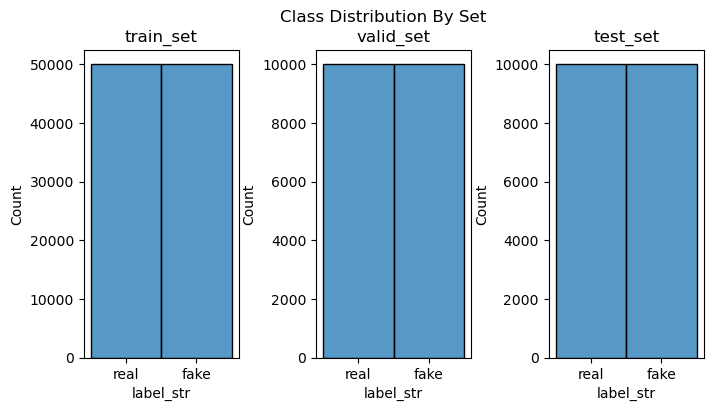

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(8, 4))
fig.subplots_adjust(hspace=0.30, wspace=0.5)
fig.suptitle('Class Distribution By Set')
title_list=['train_set','valid_set','test_set']
axis_list = [(0,0),(0,1),(0,2)]
for x in range(3):
    sns.histplot(data=df_list[x], x='label_str',ax=axes[x]).set(title=title_list[x])

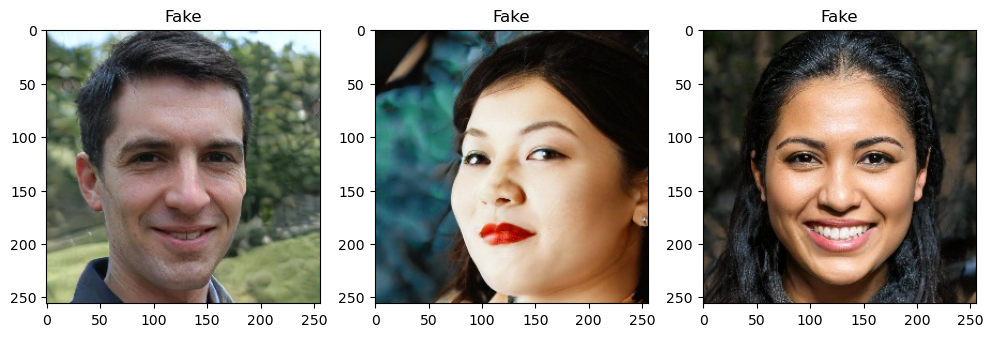

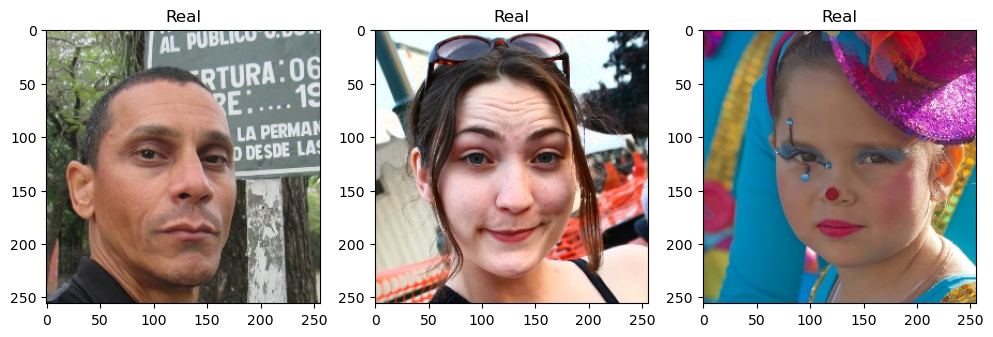

In [8]:
fake_images, real_images = sample_images('train',3)
for x in ['fake', 'real']:
    plot_images(x, fake_images, real_images)

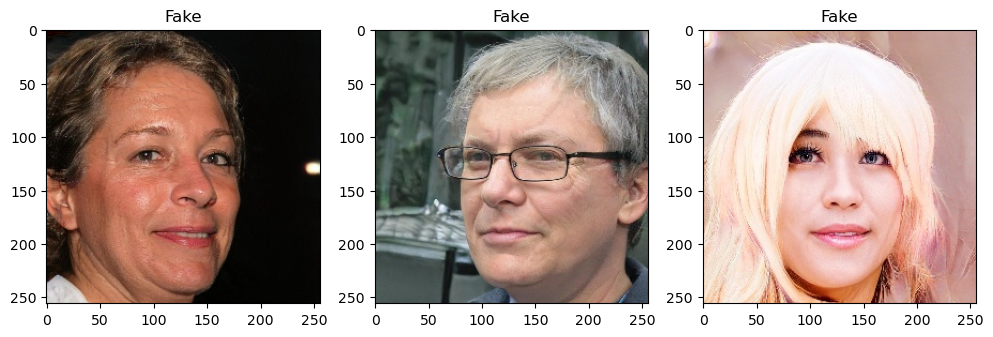

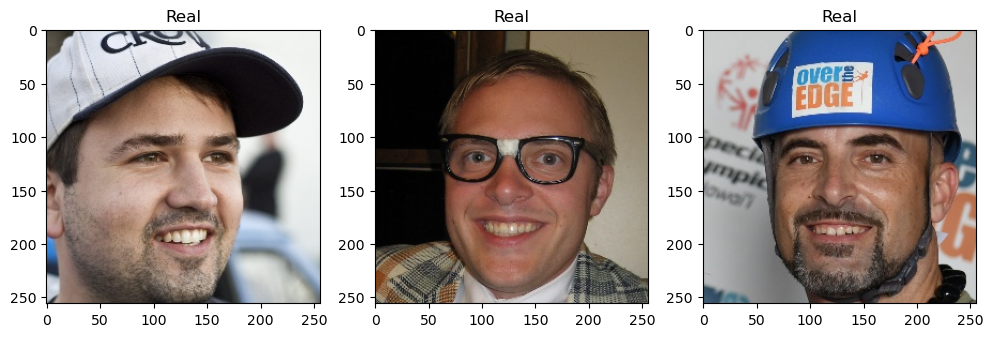

In [9]:
fake_images, real_images = sample_images('test',3)
for x in ['fake', 'real']:
    plot_images(x, fake_images, real_images)

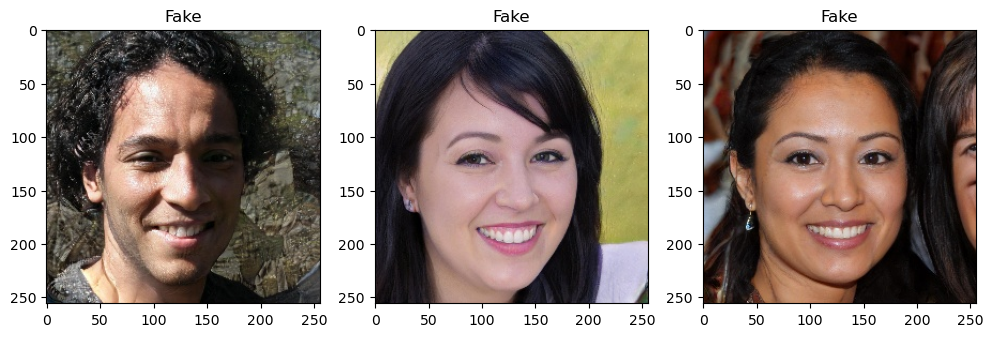

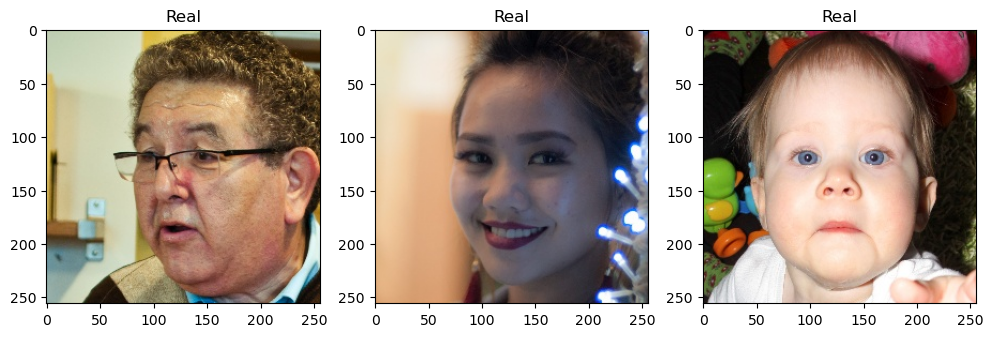

In [10]:
fake_images, real_images = sample_images('valid',3)
for x in ['fake', 'real']:
    plot_images(x, fake_images, real_images)

In [14]:
# Testing image sizes by set
train_path = train_meta['path'].to_list()
valid_path = valid_meta['path'].to_list()
test_path = test_meta['path'].to_list()
train_images = []
valid_images = []
test_images = []
for x in range(len(train_path)):
    train_images.append(Image.open(f'../real_vs_fake/real-vs-fake/{train_path[x]}').size)
for x in range(len(valid_path)):
    valid_images.append(Image.open(f'../real_vs_fake/real-vs-fake/{valid_path[x]}').size)
for x in range(len(test_path)):
    test_images.append(Image.open(f'../real_vs_fake/real-vs-fake/{test_path[x]}').size)

In [16]:
train_x, train_y = zip(*train_images)
valid_x, valid_y = zip(*valid_images)
test_x, test_y = zip(*test_images)

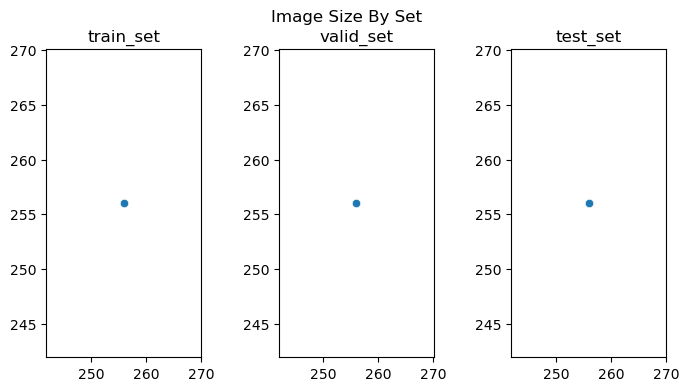

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(8, 4))
fig.subplots_adjust(hspace=0.30, wspace=0.5)
fig.suptitle('Image Size By Set')
title_list=['train_set','valid_set','test_set']
axis_list = [(0,0),(0,1),(0,2)]
x_values = [train_x, valid_x, test_x]
y_values = [train_y, valid_y, test_y]
for x in range(3):
    sns.scatterplot(x=x_values[x], y=y_values[x],ax=axes[x]).set(title=title_list[x])

In [ ]:
# testing for rgb or greyscale
train_colors = []
valid_colors = []
test_colors = []
for x in range(len(train_path)):
    train_colors.append(Image.open(f'../real_vs_fake/real-vs-fake/{train_path[x]}').getbands())
for x in range(len(valid_path)):
    valid_colors.append(Image.open(f'../real_vs_fake/real-vs-fake/{valid_path[x]}').getbands())
for x in range(len(test_path)):
    test_colors.append(Image.open(f'../real_vs_fake/real-vs-fake/{test_path[x]}').getbands())
#valid_image = Image.open(f'../real_vs_fake/real-vs-fake/{valid_path}')
#test_image = Image.open(f'../real_vs_fake/real-vs-fake/{test_path}')
#print(f'train_color = {train_image.getbands()}, valid_color = {valid_image.getbands()}, test_color = {test_image.getbands()}')

In [43]:
train_rgb = []
valid_rgb = []
test_rgb = []
for x in train_colors:
    if x == ('R', 'G', 'B'):
        train_rgb.append(x)
for x in valid_colors:
    if x == ('R', 'G', 'B'):
        valid_rgb.append(x)
for x in test_colors:
    if x == ('R', 'G', 'B'):
        test_rgb.append(x)
len(train_rgb), len(valid_rgb), len(test_rgb)

(140000, 0, 0)

In [35]:
fake_images, real_images

(['train/fake/4IICCUR3AL.jpg'], ['train/real/54446.jpg'])

In [36]:
fake_image = Image.open(f'../real_vs_fake/real-vs-fake/{fake_images[0]}')
real_image = Image.open(f'../real_vs_fake/real-vs-fake/{real_images[0]}')

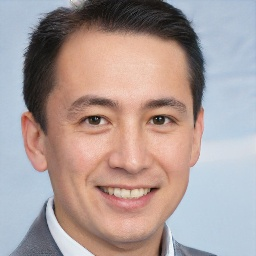

In [37]:
fake_image

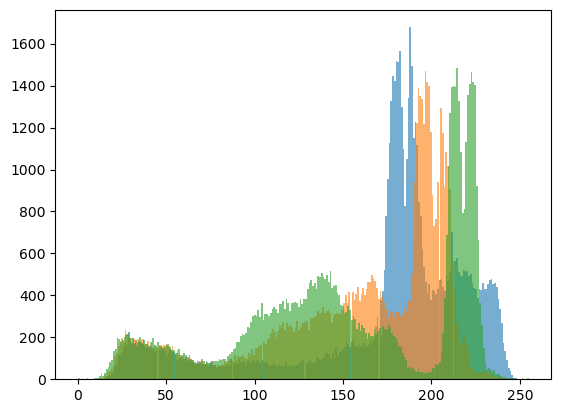

In [38]:
fake_array = np.array(fake_image)
for x in range(3):
    plt.hist(fake_array[:, :, x].ravel(), bins=256, color=f'C{x}', alpha=0.6)
plt.show()

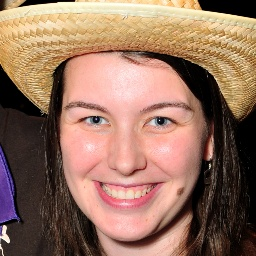

In [39]:
real_image

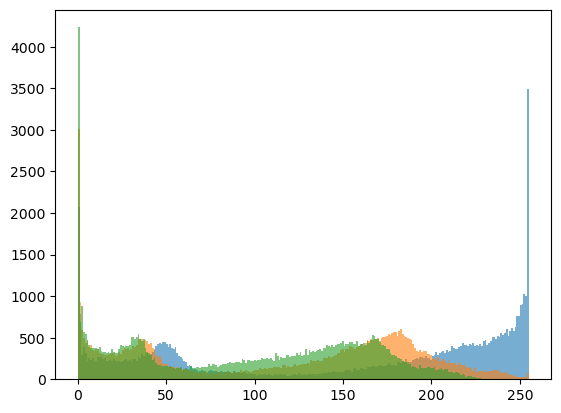

In [40]:
real_array = np.array(Image.open(f'../real_vs_fake/real-vs-fake/{real_images[0]}'))
for x in range(3):
    plt.hist(real_array[:, :, x].ravel(), bins=256, color=f'C{x}', alpha=0.6)
plt.show()